# Data Cleaning 🚮
![Datacleaning](https://camo.githubusercontent.com/00e2c6fad6b354d48d80b381d19ffa16c07dc69e/68747470733a2f2f692e696d67666c69702e636f6d2f3478793266722e6a7067)



En análisis de datos, aproximadamente del 60% al 80% del tiempo es invertido en limpiar y organizar los datos, y con justa razón, pues la limpieza de datos es la etapa previa al interrogatorio que llevaremos a cabo posteriormente para obtener información. Este proceso rara vez se realiza en una sola ocasión, suele ser un proceso iterativo.
En esta lectura, abordaremos algunos de los casos más comunes de "datos sucios" y cómo afrontarlos.


> Nuestros Paquetes

        - import pandas as pd   :   Tratamiento de datos
        - import numpy as np    :   Biblioteca numerica de python
        - import datetime       :   Manejo y tratamiento de Fechas
        - import chardet        :   Modulo de Encoding para caracteres

> Nuestros Datasets

        - Dataset Derrumbes By NASA (https://www.kaggle.com/nasa/landslide-events)
        - Dataset Terremotos By Us Geological Survey (https://www.kaggle.com/usgs/earthquake-database)
        - Dataset Fifa By Karan Gadiya (https://www.kaggle.com/karangadiya/fifa19/)
        - Dataset Adult By Ronny Kohavi and Barry Becker (http://archive.ics.uci.edu/ml/datasets/Adult)
        - Dataset Kickstarter By Mickaël Mouillé obtained with Kickstarter Platform API (https://www.kaggle.com/kemical/kickstarter-projects)

### Python importamos paquetes

In [ ]:
import pandas as pd  
import numpy as np   
import seaborn as sns 
import datetime
import chardet
!python --version

Python 3.7.11


### Leer Datasets  (Pandas)

In [ ]:
earthquakes = pd.read_csv('terremotos.csv')
derrumbes = pd.read_csv('derrumbes.csv')
fifa = pd.read_csv('fifa.csv')
fifaM = pd.read_csv('fifaM.csv')
adult = pd.read_csv('adult.csv')
chavos_prepa = pd.read_csv('snsdata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,4,8,9,14,16,17,18,23,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Manejo y transformación de Fechas

In [ ]:
# Vamos a utilizar para las fechas datasets con terremotos entre 1965 y 2016 y con Derrumbes enre 2007 y 2016

derrumbes.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
# Checar Tipo de Dato de la columna fecha en los derrumbes
derrumbes['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [ ]:
# dtype: object Pandas usa el Object para referirse a varios tipos de datos pero normalmente son strings
derrumbes['date'].dtype

dtype('O')

In [ ]:
# Transformar a fechas de a devis
derrumbes['date_parsed'] = pd.to_datetime(derrumbes['date'], format = "%m/%d/%y")
derrumbes['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [ ]:
derrumbes

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,Above road,35.2219,-82.3226,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...,2015-12-07
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,Natural slope,38.3987,-81.5848,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...,2016-02-22
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,Above road,37.4096,-81.4268,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...,2016-02-23
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,Above road,37.5011,-81.1093,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...,2016-02-26


In [ ]:
dia_del_mes_derrumbes = derrumbes['date_parsed'].dt.day
dia_del_mes_derrumbes

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

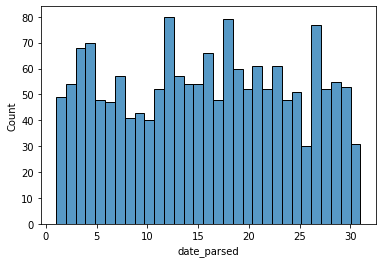

In [ ]:
# Grafiquemos para double-check
# doesn't hurt to double-check that the days of the month we've extracted make sense.

dia_del_mes_derrumbes = dia_del_mes_derrumbes.dropna()

sns.histplot(dia_del_mes_derrumbes, kde=False, bins=31)


In [ ]:
# Que pasa si la fecha de un Dataset viene en varios Formatos???
accounts = pd.read_csv('accounts.csv')
accounts

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568
...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191
94,95,6C7509C9,"September 16, 2000",212089
95,96,BD969A9D,2007-04-29,167238
96,97,B0CDCE3D,"May 28, 2014",145240


In [ ]:
# Notilla extra, si en la columna a parsear hay varios tipos de formato de fecha, mejor decirle al python que la infiera
accounts['date_opened_parsed'] = pd.to_datetime(accounts['date_opened'], infer_datetime_format=True)
accounts['date_opened_parsed']


0    2003-10-19
1    2018-10-05
2    2008-07-29
3    2005-06-09
4    2012-03-31
        ...    
93   2004-02-20
94   2000-09-16
95   2007-04-29
96   2014-05-28
97   2007-10-14
Name: date_opened_parsed, Length: 98, dtype: datetime64[ns]

### Remover y reemplazar  y modificar caracteres no deseados
Otro problema común es la presencia de caracteres que no deseamos en nuestros valores. Estos pueden constituir alguno de los siguientes casos:
 - Caracteres erróneos introducidos por error humano o error de máquina al realizar los registros.
 - Caracteres que fueron introducidos para indicar una divisa, unidad de medida, categoría, etc. O bien para simplificar los datos.
 - Caracteres erróneos introducidos por una cambio en la codificación de nuestro sistema respecto a la codificación de los datos.

In [ ]:
adult


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#hay un detalle con los nombres de las columnas
adult.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
#Para evitar batallar con esos espacios             https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
adult = adult.rename(columns={' Male': 'Male'})

In [ ]:
adult.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', 'Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

¿Cómo cambiarias las demás columnas para que no tengan ese espacio?


In [ ]:
#escribe tu código aquí

colClean = [str(col).replace(' ','') for col in adult.columns]
adult.columns = colClean







### Otros tipos de caracteres no deseados

In [ ]:
# Utilizaremos la Bd de fifa
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [ ]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
#Veamos su estructura
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

#### Que tal ahora una descipcion estadística? 🙈

In [ ]:
fifa.describe()
#fifa.describe().info

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [ ]:
#sueldo
fifa['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

str.translate(table[, deletechars]);


In [ ]:
fifa['wage_trimmed'] = fifa['Wage'].str.translate({ord(i): None for i in '€K'})
fifa['wage_trimmed']

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: wage_trimmed, Length: 18207, dtype: object

In [ ]:
fifa['wage_numeric'] = fifa['wage_trimmed'].astype(int) * 1000

In [ ]:
fifa['wage_numeric'].head(10)

0    565000
1    405000
2    290000
3    260000
4    355000
5    340000
6    420000
7    455000
8    380000
9     94000
Name: wage_numeric, dtype: int64

#### Otro tipo de caso aunque similiar tiene un particularidad 🤐

In [ ]:
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.translate({ord('€'): None})
fifaM

,Unnamed: 0,X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club.Logo,Value,Wage,Special,Preferred.Foot,International.Reputation,Weak.Foot,Skill.Moves,Work.Rate,Body.Type,Real.Face,Position,Jersey.Number,Joined,Loaned.From,Contract.Valid.Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
0,1,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,...,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,565M
1,2,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,...,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,405M
2,3,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,...,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,290M
3,4,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,...,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,260M
4,5,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,...,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,355M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18203,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1,2,2,Medium/ Medium,Lean,No,CM,22,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,...,45+2,45+2,45+2,45+2,45+2,34,38,40,49,25,42,30,34,45,43,54,57,60,49,76,43,55,40,47,38,46,46,39,52,43,45,40,48,47,10,13,7,8,9,143K
18203,18204,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.

In [ ]:
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.replace('K', '000')
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.replace('M', '000000')

In [ ]:
print(fifaM['Release.Clause'])

0        565000000
1        405000000
2        290000000
3        260000000
4        355000000
           ...    
18202       143000
18203       113000
18204       165000
18205       143000
18206       165000
Name: Release.Clause, Length: 18207, dtype: object



## Vamos bien!!


![vas_bien](https://i.pinimg.com/564x/86/1f/c0/861fc0bbaf64bd6c65a8bf6472514300.jpg)

#### Que bueno que fifa traía el simbolo de Euro como simbolo de Euro, no? Pero. qué pasa si el dataset tiene algo como esto:
#### æ–‡å—åŒ–ã?? o ����������

In [ ]:
##  What Are encodings???? ##

# Character encodings are specific sets of rules for mapping from raw binary byte strings 
# (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi")
# UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. 
# It's when things aren't in UTF-8 that you run into trouble.

before = "This is the euro symbol: €"
type(before)


str

In [ ]:
print(before)

This is the euro symbol: €


In [ ]:
after = before.encode("utf-8", errors = "replace")
type(after)

bytes

In [ ]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [ ]:
print(after.decode("ascii"))

UnicodeDecodeError: ignored

In [ ]:
print(after.decode("utf-8"))

This is the euro symbol: €


In [ ]:
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")


In [ ]:
after

b'This is the euro symbol: ?'

In [ ]:
# convert it back to utf-8
print(after.decode("ascii"))

This is the euro symbol: ?


## The best time to convert non UTF-8 input into UTF-8 is when you read in files


![image.png](attachment:4f70f4bc-de04-4d1d-9c4c-7067fc61abdb.png)

In [ ]:
polis = pd.read_csv("PoliceKillingsUS.csv")

UnicodeDecodeError: ignored

In [ ]:
#https://docs.python.org/3/library/codecs.html#standard-encodings


In [ ]:
Police_Killing = pd.read_csv("PoliceKillingsUS.csv", encoding='utf-8')

UnicodeDecodeError: ignored

In [ ]:
with open("PoliceKillingsUS.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
Police_Killing = pd.read_csv("PoliceKillingsUS.csv", encoding='Windows-1252')
Police_Killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
#Ejercicio 
#kickstarter_2016 = pd.read_csv("databases/kickstarter-encoding.csv")

## Valores Fuera de Rango y valores perdidos
Cuando hacemos limpieza de datos, siempre es necesario recurrir a nuestro conocimiento del tema y del origen de la base de datos para saber si estos tienen sentido. A veces puede ser algo tan complicado como cuadrar cantidades que cambian en el tiempo respecto de otras 2 o 3 variables, o puede ser algo más del "sentido común" como identificar que un valor negativo en una columna de edades constituye una anomalía.

In [ ]:
chavos_prepa = pd.read_csv('snsdata.csv')
chavos_prepa

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
chavos_prepa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [ ]:
chavos_prepa.describe(include='all')

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,27276,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.500000,NaN,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,NaN,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,NaN,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,NaN,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,NaN,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,NaN,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Vamos a ver cuantos Valores NA tenemos en nuestra columna de Age
missing_values_age_count = chavos_prepa['age'].isnull().sum()
missing_values_age_count

5086

In [ ]:
number_of_rows = len(chavos_prepa)
number_of_rows

30000

In [ ]:
print('Porcentaje total de Edades perdidas en el dataset es:', (missing_values_age_count/number_of_rows) *100)

Porcentaje total de Edades perdidas en el dataset es: 16.953333333333333


In [ ]:
chavos_prepa['age'].dropna()

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age, Length: 24914, dtype: float64

![morro_meco](https://pbs.twimg.com/media/Edm2smXU4AArpjW.jpg)

### Truco aquí 👇🏼

In [ ]:
chavos_prepa['age_filled'] = np.where(chavos_prepa['age'].isnull(), np.mean(chavos_prepa['age']), chavos_prepa['age'])
chavos_prepa['age_filled']

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age_filled, Length: 30000, dtype: float64

In [ ]:
chavos_prepa_count = chavos_prepa['age_filled'].isnull().sum()
chavos_prepa_count

0

### Acotar Valores y double double check 🙌🏼

In [ ]:
## Crearemos un histograma para identificar valores fuera de rango
# Creamos los cortes
min_teen_age = 12
max_teen_age = 21

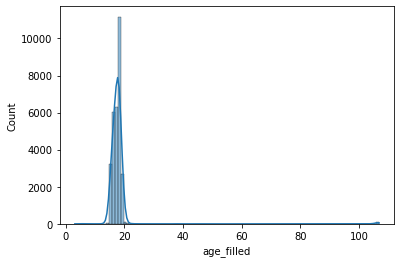

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=True, bins=int(np.max(chavos_prepa['age_filled'])))

In [ ]:
# Reemplazamos las edades por encima del rango con la edad máxima

chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] > max_teen_age, max_teen_age, chavos_prepa['age_filled'])

print(int(np.max(chavos_prepa['age_filled'])))



21


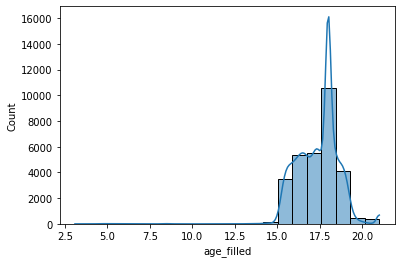

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=True, bins=int(np.max(chavos_prepa['age_filled'])))

In [ ]:
# Reemplazamos las edades por debajo del rango con la edad mínima

chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] < min_teen_age, min_teen_age, chavos_prepa['age_filled'])

print(int(np.min(chavos_prepa['age_filled'])))


12


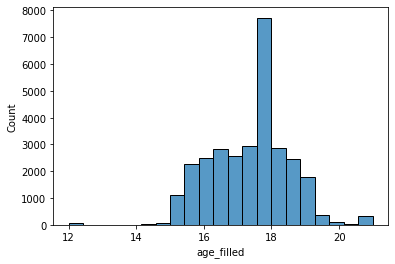

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=False, bins=int(np.max(chavos_prepa['age_filled'])))

### Uniformidad en tipo de cambio

In [ ]:
#  Vamos a ver para que nos va a servir la base anterior

accounts

,Unnamed: 0,id,date_opened,total,date_opened_parsed
0,1,A880C79F,2003-10-19,169305,2003-10-19
1,2,BE8222DF,"October 05, 2018",107460,2018-10-05
2,3,19F9E113,2008-07-29,15297152,2008-07-29
3,4,A2FE52A3,2005-06-09,14897272,2005-06-09
4,5,F6DC2C08,2012-03-31,124568,2012-03-31
...,...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191,2004-02-20
94,95,6C7509C9,"September 16, 2000",212089,2000-09-16
95,96,BD969A9D,2007-04-29,167238,2007-04-29
96,97,B0CDCE3D,"May 28, 2014",145240,2014-05-28


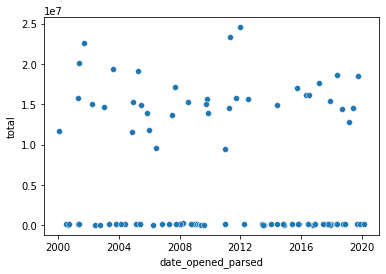

In [ ]:
sns.scatterplot(data=accounts, x="date_opened_parsed", y="total")

In [ ]:
# The formula to convert yen to dollars is USD = JPY / 104.

account_offices = pd.read_csv('account_offices.csv')

#account_offices.info()
account_offices


,id,office
0,A880C79F,New York
1,BE8222DF,New York
2,19F9E113,Tokyo
3,A2FE52A3,Tokyo
4,F6DC2C08,New York
...,...,...
93,65EAC615,New York
94,6C7509C9,New York
95,BD969A9D,New York
96,B0CDCE3D,New York


In [ ]:
accounts

,Unnamed: 0,id,date_opened,total,date_opened_parsed
0,1,A880C79F,2003-10-19,169305,2003-10-19
1,2,BE8222DF,"October 05, 2018",107460,2018-10-05
2,3,19F9E113,2008-07-29,15297152,2008-07-29
3,4,A2FE52A3,2005-06-09,14897272,2005-06-09
4,5,F6DC2C08,2012-03-31,124568,2012-03-31
...,...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191,2004-02-20
94,95,6C7509C9,"September 16, 2000",212089,2000-09-16
95,96,BD969A9D,2007-04-29,167238,2007-04-29
96,97,B0CDCE3D,"May 28, 2014",145240,2014-05-28


In [ ]:
accounts_global = pd.merge(accounts, account_offices, on="id")
print(accounts_global)

    Unnamed: 0        id  ... date_opened_parsed    office
0            1  A880C79F  ...         2003-10-19  New York
1            2  BE8222DF  ...         2018-10-05  New York
2            3  19F9E113  ...         2008-07-29     Tokyo
3            4  A2FE52A3  ...         2005-06-09     Tokyo
4            5  F6DC2C08  ...         2012-03-31  New York
..         ...       ...  ...                ...       ...
93          94  65EAC615  ...         2004-02-20  New York
94          95  6C7509C9  ...         2000-09-16  New York
95          96  BD969A9D  ...         2007-04-29  New York
96          97  B0CDCE3D  ...         2014-05-28  New York
97          98  33A7F03E  ...         2007-10-14  New York

[98 rows x 6 columns]


In [ ]:
accounts_global['total_usd'] = np.where(accounts_global['office'] == 'Tokyo', accounts_global['total'] / 104, accounts_global['total'])
print(accounts_global)

    Unnamed: 0        id  ...    office  total_usd
0            1  A880C79F  ...  New York   169305.0
1            2  BE8222DF  ...  New York   107460.0
2            3  19F9E113  ...     Tokyo   147088.0
3            4  A2FE52A3  ...     Tokyo   143243.0
4            5  F6DC2C08  ...  New York   124568.0
..         ...       ...  ...       ...        ...
93          94  65EAC615  ...  New York   140191.0
94          95  6C7509C9  ...  New York   212089.0
95          96  BD969A9D  ...  New York   167238.0
96          97  B0CDCE3D  ...  New York   145240.0
97          98  33A7F03E  ...  New York   191839.0

[98 rows x 7 columns]


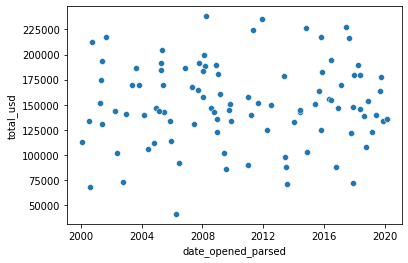

In [ ]:
sns.scatterplot(data=accounts_global, x="date_opened_parsed", y="total_usd")

### Datos duplicados
![gatos_duplicados](https://s-media-cache-ak0.pinimg.com/originals/d2/4c/c7/d24cc7a35abea701eb36dc58c53a3a1d.jpg)


Este problema se divide en dos tipos

     - Duplicados totales
     - Duplicados parciales


In [ ]:
letters = pd.read_csv('letters.csv')
letters

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
duplic = letters.duplicated()
duplic

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool

In [ ]:
sum(letters.duplicated())

2

In [ ]:
letters[duplic]

,column1,column2,column3
5,a,b,1000
6,a,b,1000


In [ ]:
# Remover duplicados totales

letters = letters.drop_duplicates()
sum(letters.duplicated())


0

In [ ]:
letters[duplic]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,column1,column2,column3


In [ ]:
# Weno weno, pero y los duplicados de 1 sola columna???
letters = pd.read_csv('letters.csv')
letters

,column1,column2,column3
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
letters.rename(columns={"column1": "alumno", "column2": "curso", "column3": "pago"})


,alumno,curso,pago
0,a,b,1000
1,a,c,4000
2,d,f,4500
3,a,f,7000
4,b,b,3000
5,a,b,1000
6,a,b,1000
7,a,b,3000
8,d,f,8000
9,d,f,5000


In [ ]:
letters.drop_duplicates(subset=['column1'])

,column1,column2,column3
0,a,b,1000
2,d,f,4500
4,b,b,3000


## Challenges

Esta colección consta de 5 ejercicios de los problemas típicos de limpieza de datos. Puedes resolverlos directamente en este enlace de [Kaggle](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)